# MFsynthesis library examples.
# Generate random multivariate, multifractal scalar field in 1D and 2D.

To run this library you need to have some very common libraries installed:
  - time
  - warnings
  - scipy
  - numpy 
  - matplotlib
  - functools 
  - concurrent.futures 


In [1]:
# %matplotlib notebook
# load libraries
import MFsynthesis as MF
import matplotlib.pyplot as plt


# One dimensional synthesis.
## Process synthesis and visualisation.
### Non stationary processes : Fractional Brownian Motion and multifractal random walk.
You need to define the dimension, the Hurst exponent ($H$) and the intermittency parameter $\epsilon$.
An optional parameter allow us to choose the number of thread that work in the FFTs.

In [2]:
# choose the parameters of the field
dim = 1  # dimension of the field
N = 2**16  # size of the realisation
H = 0.3  # Hurst exponent
c2 = 0.05  # intermittency parameters
workers = 4  # number of threads use in the FFT's
# a non stationary
MRWn, MRWnoise = MF.synthmrw(dim, N, H, c2, workers=4)

### Stationary processes.
You need to define two more parameters : a dissipative scales $\epsilon$ and an integral scale $T$.
Below the dissipative scale the process will be derivable. Betwwen dissipative and integral scales, the process displays power law prescribed par the parameters $(H, c_2)$.

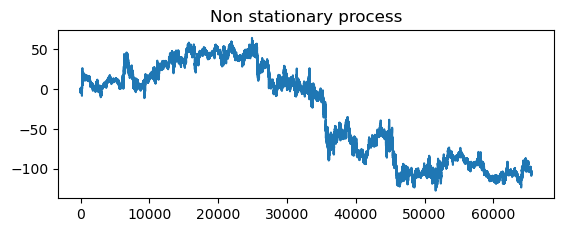

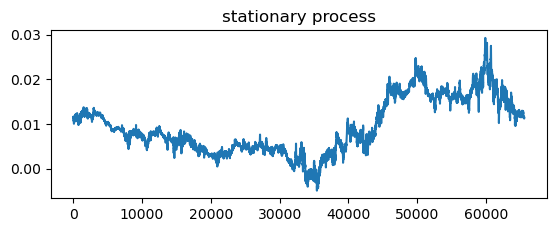

In [3]:
# a stationary one :
# we need to define a large scale T and a dissipative scale epsilon
epsilon = 1
T = N//4
MRWs = MF.synthMultiFractalField(dim, N, H, c2, regparam=[epsilon, T],
                                     workers=workers)
plt.figure(1)
plt.clf()
plt.subplot(211)
plt.plot(MRWn)
plt.title('Non stationary process')
plt.show()
plt.subplot(212)
plt.plot(MRWs)
plt.title('stationary process')
plt.show()

## Validation of the parameters prescription.
You need to choose the number of realisation of the process for the validation and pass it as 
as validate. This option is valid for the two functions.

running synthMultiFractalField function
Validation on 5 realisations.
0 1 2 3 4 

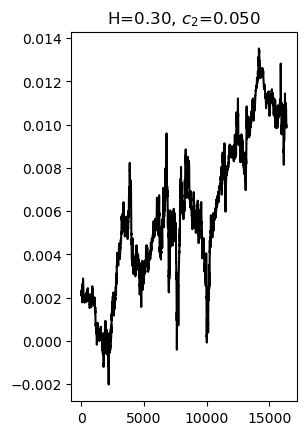

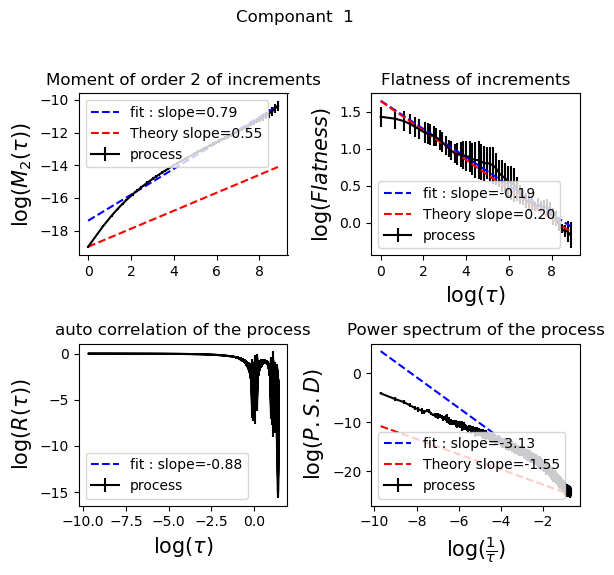

In [4]:
Nreal = 5
MRWs = MF.synthMultiFractalField(dim, N, H, c2, regparam=[epsilon, T], workers=workers, validate=Nreal)

# Multivariate one dimensional process
We need to define $(H, c_2)$ for each variable and the dependance between the variables. 
As the synthesis of one variable rely on two noises, we can prescribe two covariance matrix. 
These matrix must be square numpy array, symmetric  and have have a size equal to the number of variable
    

In [5]:
H = [.7, .3]  # H is now a list of Hurst exponeny
c2 = [0.05, 0.025] # the intermittency exponent is a list with same size as H
rho = [[1, .3],
       [.3, 1]]  # correlation of the invariant noise
rhomf = [[1, .7],
        [.7, 1]]  # correlation of the gaussian multiplicative chaos
MRWn, MRWnoise = MF.synthmrw(dim, N, H, c2, rho=rho, rhomf=rhomf, workers=workers)
print(MRWn.shape)

(65536, 2)


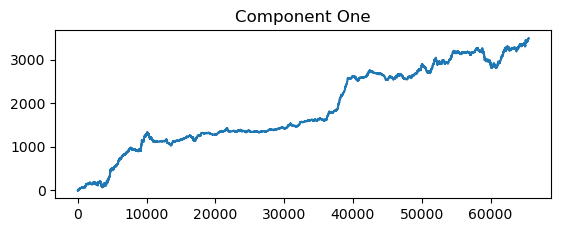

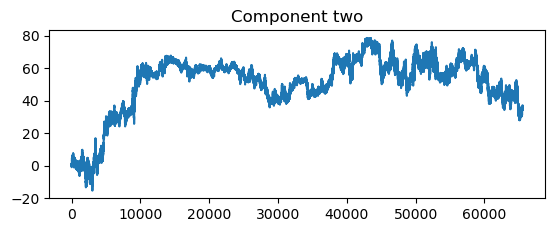

In [6]:
plt.figure(1)
plt.clf()
plt.subplot(211)
plt.plot(MRWn[:, 0])
plt.title('Component One')
plt.show()
plt.subplot(212)
plt.plot(MRWn[:, 1])
plt.title('Component two')
plt.show()

# Two dimensional synthesis.
The only difference withe one dimensional analysis is the paramater dim wich now take a value of 2.
## Process synthesis and visualisation.
### Non stationary processes : Fractional Brownian Motion and multifractal random walk.

In [29]:
dim = 2  # dimension of the field
N = 2**10 # size of the images
H = .3
c2 = 0.025
MRWn, MRWnoise = MF.synthmrw(dim, N, H, c2, workers=4)

### Stationary processes.

In [30]:
epsilon = 1
T = N//4
MRWs = MF.synthMultiFractalField(dim, N, H, c2, regparam=[epsilon, T], workers=workers)
    

Text(0.5, 1.0, 'stationary process')

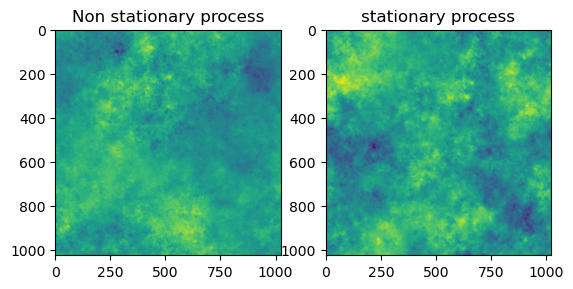

In [31]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(MRWn)
ax[0].set_title('Non stationary process')
ax[1].imshow(MRWs)
ax[1].set_title('stationary process')


## Validation of the parameters prescription.

running synthMultiFractalField function
Validation on 5 realisations.
0 1 2 3 4 

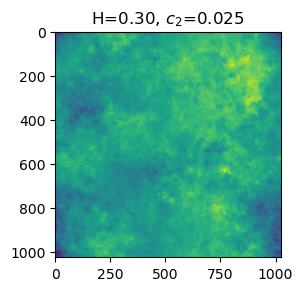

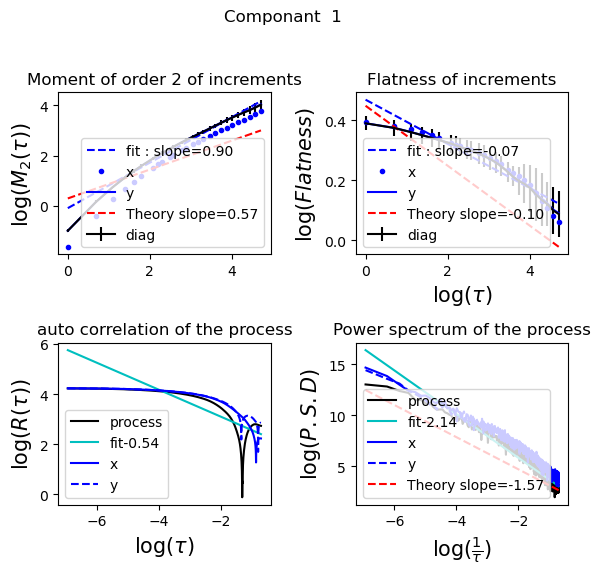

In [32]:
Nreal = 5
MRWs = MF.synthMultiFractalField(dim, N, H, c2, regparam=[epsilon, T], workers=workers, validate=Nreal)

# Multivariate Two dimensional processes.

Text(0.5, 1.0, 'stationary : component 1')

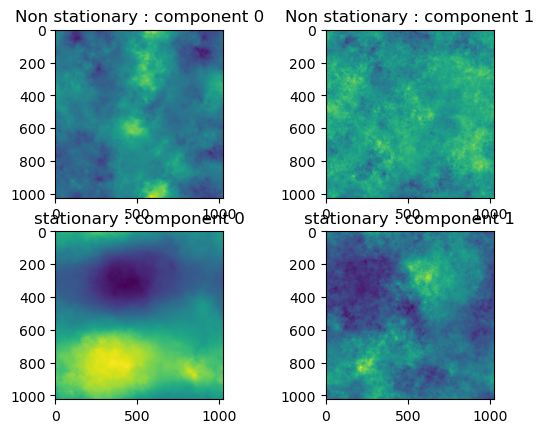

In [33]:
H = [.7, .3]
c2 = [0.05, 0.025]   # the intermittency exponent is a list with same size as H
rho = [[1, .3], 
       [.3, 1]]  # correlation of the invariant noise
rhomf = [[1, .7],
         [.7, 1]]  # correlation of the gaussian multiplicative chaos
MRWn, MRWnoise = MF.synthmrw(dim, N, H, c2, rho=rho, rhomf=rhomf, workers=workers)

# a stationary one :
epsilon = 1
T = N//4
MRWs = MF.synthMultiFractalField(dim, N, H, c2, rho=rho, rhomf=rhomf, regparam=[epsilon, T], workers=workers)
    
fig, ax = plt.subplots(2,2)
ax[0, 0].imshow(MRWn[:, :, 0])
ax[0, 0].set_title('Non stationary : component 0')
ax[0, 1].imshow(MRWn[:, :, 1])
ax[0, 1].set_title('Non stationary : component 1')
ax[1, 0].imshow(MRWs[:, :, 0])
ax[1, 0].set_title('stationary : component 0')
ax[1, 1].imshow(MRWs[:, :, 1])
ax[1, 1].set_title('stationary : component 1')


# Anisotropic Two dimensional processes.
You need to define two more parameters $\alpha$ and $\theta$.


In [34]:
alpha = 0.7
theta = 0  # the angle of the base (X, Y) with (horyzontal, vertical) axes.

MRWn, MRWnoise = MF.synthmrw(dim, N, H, c2, Ani=[alpha, theta], workers=workers)


Text(0.5, 1.0, 'stationary : component 1')

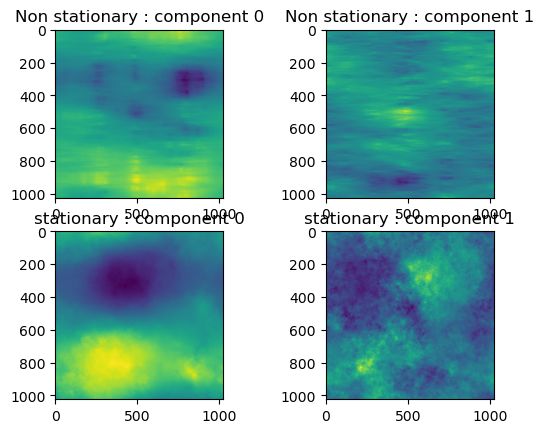

In [35]:
fig, ax = plt.subplots(2,2)
ax[0, 0].imshow(MRWn[:, :, 0])
ax[0, 0].set_title('Non stationary : component 0')
ax[0, 1].imshow(MRWn[:, :, 1])
ax[0, 1].set_title('Non stationary : component 1')
ax[1, 0].imshow(MRWs[:, :, 0])
ax[1, 0].set_title('stationary : component 0')
ax[1, 1].imshow(MRWs[:, :, 1])
ax[1, 1].set_title('stationary : component 1')